In [2]:
import matplotlib.pyplot as plt
import torch

import numpy as np

In [4]:
dogs = torch.load("dogs_tensor.pt")
planes = torch.load("plane_tensor.pt")

from labproject.plotting import STYLE_PATH

plt.style.use(STYLE_PATH)

In [5]:
mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1)

# Undo normalization
dogs = dogs * std + mean
planes = planes * std + mean

In [6]:
import matplotlib.pyplot as plt
import matplotlib.offsetbox as offsetbox

def imscatter(x, y, images, ax=None, zoom=1, edgecolor='black'):
    if ax is None:
        ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, img0 in zip(x, y, images):
        im = offsetbox.OffsetImage(img0.permute(1, 2, 0).numpy(), zoom=zoom)
        ab = offsetbox.AnnotationBbox(im, (x0, y0), xycoords='data', frameon=True, bboxprops=dict(edgecolor=edgecolor, lw=2))
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [7]:
torch.manual_seed(2)

In [8]:
dogs_xs = torch.randn(50)
dogs_ys = torch.randn(50)

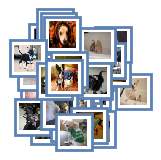

In [9]:
fig = plt.figure(figsize=(1.5,1.5))
ax = plt.gca()
plt.axis('off')
_ = imscatter(dogs_xs, dogs_ys, dogs, ax=ax, edgecolor="#5b82b3", zoom=0.3)
fig.savefig("dog_scatter.svg", bbox_inches='tight', pad_inches=0)

In [16]:
planes_x = torch.randn(50)
planes_y = torch.randn(50)

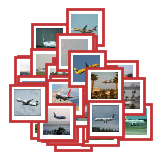

In [17]:
fig = plt.figure(figsize=(1.5,1.5))
ax = plt.gca()
plt.axis('off')
_ = imscatter(planes_x, planes_y, planes, ax=ax,edgecolor="#c23335", zoom=0.3)
fig.savefig("plane_scatter.svg", bbox_inches='tight', pad_inches=0)

In [18]:
dog_embedding = torch.load("../../../data/dog_embedding.pt")
plane_embedding = torch.load("../../../data/plane_embedding.pt")

In [23]:
torch.manual_seed(2)

In [24]:
from torch.distributions import MultivariateNormal, MixtureSameFamily

# Correlated matrix
correlation = torch.tensor([[1, 0.8], [0.8, 1]])
correlation2 = torch.tensor([[1, -0.8], [-0.8, 1]])

mean = torch.tensor([0, 0.])
mean2 = torch.tensor([0.3, 0.3])

p0 = MultivariateNormal(mean, correlation)
p1 = MultivariateNormal(mean2, correlation2)

samples1 = p0.sample((40,))
samples1 = torch.concatenate([samples1, torch.concat([torch.randn((10,1))*0.5, 2+torch.randn((10, 1))*0.2], axis=-1)], dim=0)
samples2 = p1.sample((50,))

In [25]:
m_est = samples1.mean(0)
m_est2 = samples2.mean(0)

cov_est = (samples1 - m_est).t() @ (samples1 - m_est) / 50
cov_est2 = (samples2 - m_est2).t() @ (samples2 - m_est2) / 50

In [26]:
p0_est = MultivariateNormal(m_est, cov_est)
p1_est = MultivariateNormal(m_est2, cov_est2)

x = torch.linspace(-3, 3, 100)
y = torch.linspace(-3, 3, 100)
X, Y = torch.meshgrid(x, y)
xy = torch.stack([X, Y], -1)

Z0 = p0_est.log_prob(xy).exp()
Z1 = p1_est.log_prob(xy).exp()

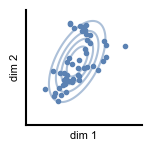

In [38]:
fig = plt.figure(figsize=(1.5,1.5))
ax = plt.gca()

plt.scatter(samples1[:, 0], samples1[:, 1], color="#5b82b3")
plt.contour(X, Y, Z0, levels=5, colors="#5b82b3", alpha=0.5)


plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xticks([])
plt.yticks([])
plt.ylabel("dim 2")
plt.xlabel("dim 1")
plt.savefig("embedding_dogs.svg", bbox_inches='tight', pad_inches=0)

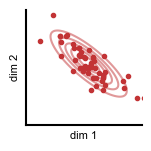

In [37]:
fig = plt.figure(figsize=(1.5,1.5))
ax = plt.gca()
plt.scatter(samples2[:, 0], samples2[:, 1], color="#c23335")
plt.contour(X, Y, Z1, levels=5, colors="#c23335", alpha=0.5)

plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.xticks([])
plt.yticks([])
plt.ylabel("dim 2")
plt.xlabel("dim 1")
plt.savefig("embedding_planes.svg", bbox_inches='tight', pad_inches=0)

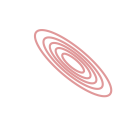

In [34]:
fig = plt.figure(figsize=(1.5,1.5))
ax = plt.gca()
plt.contour(X, Y, Z1, levels=5, colors="#c23335", alpha=0.5)

plt.axis("off")
plt.savefig("embedding_planes_contour.svg", bbox_inches='tight', pad_inches=0)

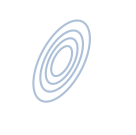

In [35]:
fig = plt.figure(figsize=(1.5,1.5))
ax = plt.gca()
plt.contour(X, Y, Z0, levels=5, colors="#5b82b3", alpha=0.5)

plt.axis("off")
plt.savefig("embedding_dogs_contour.svg", bbox_inches='tight', pad_inches=0)